In [1]:
import numpy as np
from src.embedding import new_HeatGeo
import phate
import pygsp
import matplotlib.pyplot as plt
import scipy

In [134]:
data, labels = phate.tree.gen_dla(n_branch=2, branch_length=200)
emb_op = new_HeatGeo(knn=15, tau=0.5)
emb = emb_op.fit_transform(data)
dist = emb_op.dist

In [135]:
# define a loss function for the embedding
# two important terms are the attraction from the heat-geodesic distance
# and the repulsion based large heat-geodesic distances
def loss(emb, dist, alpha=0.5, n_dims=2):
    loss = 0
    emb = emb.reshape(-1, n_dims)
    euclidean_dist = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(emb))
    # attraction
    loss = np.sum((dist - euclidean_dist)**2)
    # repulsion
    loss += alpha * np.sum(np.square(np.maximum(0, scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(emb)) - 1)))
    return loss

In [136]:
def loss2(emb, dist, alpha=0.5, n_dims=2):  
    emb = emb.reshape(-1, n_dims)
    euclidean_dist = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(emb))
    # attraction
    loss = np.sum((dist - euclidean_dist)**2)
    # repulsion
    loss += alpha * (dist**2 * euclidean_dist).sum()
    return loss

In [137]:
# initial random emb vector and optimize
emb = np.random.randn(data.shape[0], 2)
emb = scipy.optimize.minimize(loss, emb, args=(dist, 5, 2), method='L-BFGS-B', options={'maxiter': 5000}).x

/tmp/ipykernel_6550/712914691.py:3: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  emb = scipy.optimize.minimize(loss, emb, args=(dist, 5, 2), method='L-BFGS-B', options={'maxiter': 5000}).x


In [138]:
loss(emb, dist, 0.5)

4308386.427810305

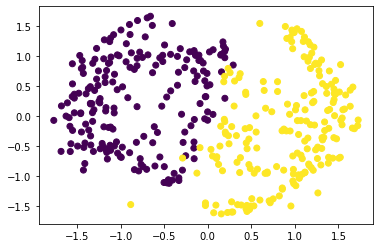

In [139]:
# Plot the 2d embedding
emb = emb.reshape(-1, 2)
plt.scatter(emb[:,0], emb[:,1], c=labels)

/tmp/ipykernel_6550/2391214380.py:3: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  emb = scipy.optimize.minimize(loss2, emb, args=(dist, 10, 2), method='L-BFGS-B', options={'maxiter': 5000}).x


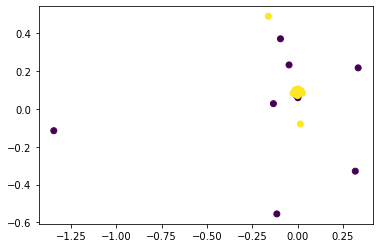

In [140]:
# Testing and ploting the second loss function
emb = np.random.randn(data.shape[0], 2)
emb = scipy.optimize.minimize(loss2, emb, args=(dist, 10, 2), method='L-BFGS-B', options={'maxiter': 5000}).x
emb = emb.reshape(-1, 2)
plt.scatter(emb[:,0], emb[:,1], c=labels)

In [141]:
def loss3(emb, dist, alpha=0.5, n_dims=2):  # same as uma, but diferent affniities
    emb = emb.reshape(-1, n_dims)
    euclidean_dist = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(emb))
    # attraction
    manifold_kernel = np.exp(-dist**2/0.05)
    euclidean_kernel = np.exp(-euclidean_dist**2/0.05)
    loss = (manifold_kernel * np.log(manifold_kernel/(euclidean_kernel+0.0001) + 0.0001)).sum()
    # repulsion
    loss += alpha * ((1-manifold_kernel) * np.log((1-manifold_kernel)/(1-euclidean_kernel + 0.0001))).sum()
    return loss

In [142]:
# Testing and ploting the third loss function
emb = np.random.randn(data.shape[0], 2)
emb = scipy.optimize.minimize(loss3, emb, args=(dist, 1, 2), options={'maxiter': 8000}).x
emb = emb.reshape(-1, 2)
plt.scatter(emb[:,0], emb[:,1], c=labels)

/tmp/ipykernel_6550/2166880839.py:3: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  emb = scipy.optimize.minimize(loss3, emb, args=(dist, 1, 2), options={'maxiter': 8000}).x
